<a href="https://colab.research.google.com/github/EddyGiusepe/Cyber_Security_1/blob/main/CyberSecurity_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align='center'>Cyber Security -- Kaggle</h2> 


**Data Scientist Jr.:**  Dr.Eddy Giusepe Chirinos Isidro


Neste Script reproduziremos e exploraremos ataques cibernéticos. Basicamente temos Dados onde no último mês, alguns eventos de SEGURANÇA CIBERNÉTICA com durações e padrões diferentes foram registrados.


Nesse sentido, podemos derivar:

* Endereço de IP de destino mais direcionado,
* A maioria das portas lógicas atacadas,
* Tipo de ataque mais frequente/comum,
* Hora diferente do dia (odd (estranho), horas, dia ou noite),
* Encontrar um padrão.

Este Script está baseado nos seguintes links:

* [Cyber Security](https://www.kaggle.com/iamranjann/exploring-attacks-cybersec/notebook).
* [Cyber Security no YouTube](https://www.youtube.com/watch?v=7q8XQSUeUPc&list=PLlUZLZydkS79ctBEkAqeNj5k0RNvAvvD7&index=1).

## Importamos as nossas bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipaddress
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from datetime import datetime, timedelta
import math
import missingno as msno
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore') 

## Carregamos nossos Dados de Cyber Security

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/3_EDDY_ISH_TECNOLOGIA/3_Data_Science_Augusto_Eddy/Attacks CyberSecurity Kaggle/Cybersecurity_attacks.csv")


In [ ]:
df.shape

(178031, 11)

In [ ]:
# Observamos que as nossas colunas são:

df.columns

Index(['Attack category', 'Attack subcategory', 'Protocol', 'Source IP',
       'Source Port', 'Destination IP', 'Destination Port', 'Attack Name',
       'Attack Reference', '.', 'Time'],
      dtype='object')

In [ ]:
df.head(5)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418


## Análise, limpeza e exploração de nossos Dados

In [ ]:
# Na coluna "time" aplicamos o método --> split(), para separar em tempo de início e tempo final

df[['Start time', 'Last time']] = df['Time'].str.split('-', expand=True)

df.sample(6)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time,Start time,Last time
144110,Fuzzers,RIP,udp,175.45.176.0,32531,149.171.126.15,520,Fuzzer: RIP Entry Routetag (https://strikecent...,NaN,.,1424254179-1424254179,1424254179,1424254179
752,Exploits,Clientside,tcp,175.45.176.2,42050,149.171.126.16,110,Microsoft Office Excel Cache Code Execution (P...,CVE 2009-3127 (http://cve.mitre.org/cgi-bin/cv...,.,1421927854-1421927857,1421927854,1421927857
107471,DoS,HTTP,compaq-peer,175.45.176.1,0,149.171.126.17,0,PHP5 php_register_variable_ex Buffer Overflow ...,CVE 2012-0830 (http://cve.mitre.org/cgi-bin/cv...,.,1424244399-1424244399,1424244399,1424244399
105786,Exploits,Miscellaneous,wb-expak,175.45.176.1,0,149.171.126.17,0,IBM Rational Focal Point Information Disclosur...,CVE 2013-5398 (http://cve.mitre.org/cgi-bin/cv...,.,1424244389-1424244389,1424244389,1424244389
88032,Exploits,Miscellaneous,sctp,175.45.176.2,0,149.171.126.12,0,Airlive IP Camera List Parameter Information D...,CVE 2013-3686 (http://cve.mitre.org/cgi-bin/cv...,.,1424237900-1424237900,1424237900,1424237900
175295,Exploits,Miscellaneous,ospf,175.45.176.3,75393,149.171.126.14,0,HP OpenView NNM ovwebsnmpsrv Buffer Overflow (...,CVE 2009-4181 (http://cve.mitre.org/cgi-bin/cv...,.,1424246643-1424246702,1424246643,1424246702


In [ ]:
# Percebemos que temos uma coluna com nome --> "."
# Vejamos nesta coluna se temos algum valor (numérico o categórico), assim:

df['.'].unique()


array(['.'], dtype=object)

In [ ]:
# Seguidamente eliminamos colunas que não são uteis para nossa análise
# Dropamos colunas e fazemos uma cópia na memória do objeto

df = df.drop(['.', 'Time'], axis=1) 

df.sample(6)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
158206,Fuzzers,OSPF,ttp,175.45.176.2,0,149.171.126.17,0,BGP Update: Random Path Attributes (https://st...,NaN,1424258816,1424258816
153227,Reconnaissance,ICMP,emcon,175.45.176.2,0,149.171.126.17,0,IP Options: Extended Security (IP Option 5) (h...,NaN,1424258741,1424258741
54283,Fuzzers,OSPF,unas,175.45.176.3,0,149.171.126.19,0,Fuzzer: OSPF Link State Request Packet: Basic ...,NaN,1424230324,1424230324
49560,Reconnaissance,ICMP,visa,175.45.176.3,0,149.171.126.19,0,IP Options: Record Route (IP Option 7) (https:...,NaN,1424230260,1424230260
18064,Exploits,Web Application,tcp,175.45.176.0,54033,149.171.126.11,80,phpBB 'highlight' Parameter Remote Code Execut...,CVE 2004-1315 (http://cve.mitre.org/cgi-bin/cv...,1424222934,1424222934
138517,Fuzzers,DCERPC,tcp,175.45.176.0,65527,149.171.126.16,135,Fuzzer: DCERPC Bind Invalid Fragment Length (h...,NaN,1424251732,1424251732


In [ ]:
df.shape

(178031, 11)

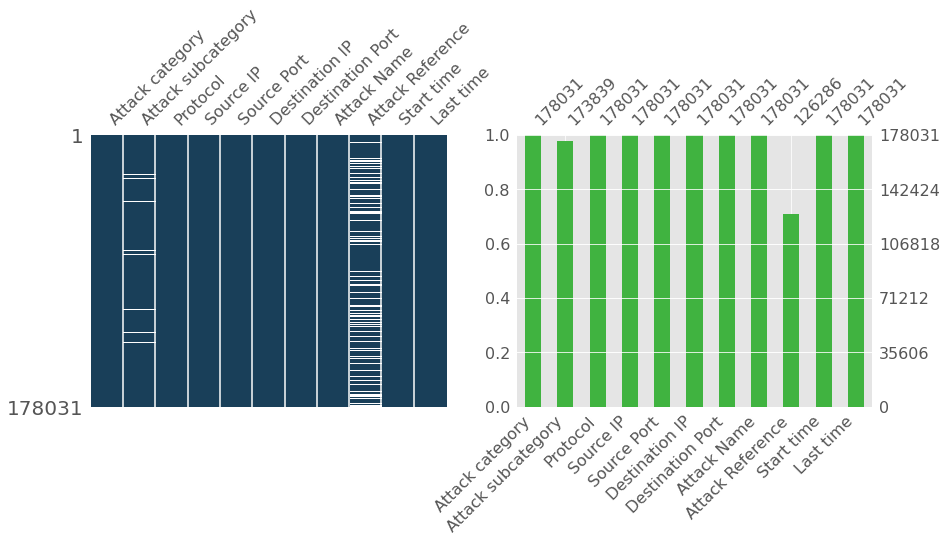

In [ ]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
msno.matrix(df, ax=ax1, sparkline=False, color=(0.1, 0.25, 0.35))
msno.bar(df, ax=ax2, color=(0.25, 0.7, 0.25))
plt.show()

In [ ]:
# Vejamos os valores MISSING que temos em nossos Dados

df.isna().sum()

Attack category           0
Attack subcategory     4192
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      51745
Start time                0
Last time                 0
dtype: int64

In [ ]:
# Também

df.isnull().sum()

Attack category           0
Attack subcategory     4192
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      51745
Start time                0
Last time                 0
dtype: int64

In [ ]:
# Aqui vamos a preecher os valores MISSING com "Not Registered"

df["Attack subcategory"] = df["Attack subcategory"].fillna("Not Registered")

In [ ]:
# Visualizamos nossos Dados e verificamos a troca de NaN --> "Not Registered"

df.sample(100)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
91610,Reconnaissance,HTTP,tcp,175.45.176.1,5840,149.171.126.10,80,Domino Web Server Database Access: /nntp/nd000...,NaN,1424239293,1424239294
83185,Exploits,Miscellaneous,unas,175.45.176.1,0,149.171.126.10,0,Microsoft Windows TCP Fin Window Size Denial o...,CVE 2013-0075 (http://cve.mitre.org/cgi-bin/cv...,1424237372,1424237372
74281,Exploits,Miscellaneous,ipnip,175.45.176.1,0,149.171.126.10,0,Linux Kernel SCTP buffer overflow (https://str...,CVE 2010-1173 (http://cve.mitre.org/cgi-bin/cv...,1424237216,1424237216
127858,Fuzzers,OSPF,rdp,175.45.176.0,0,149.171.126.17,0,Fuzzer: OSPF Hello Packet: Invalid Length (htt...,NaN,1424251588,1424251588
100119,Fuzzers,BGP,tcp,175.45.176.2,11550,149.171.126.10,179,BGP Open: Params: Long Parameter Fields (https...,NaN,1424243289,1424243290
...,...,...,...,...,...,...,...,...,...,...,...
79357,Generic,IXIA,nsfnet-igp,175.45.176.1,0,149.171.126.10,0,Linux_Kernel_NetFilter_SCTP_Unknown_Chunk_Type...,CVE 2007-2876 (http://cve.mitre.org/cgi-bin/cv...,1424237333,1424237333
15161,Fuzzers,OSPF,ospf,175.45.176.0,0,149.171.126.19,0,Fuzzer: OSPF Hello Packet: Invalid Length\tNUL...,NaN,1424220045,1424220046
24085,Fuzzers,OSPF,ospf,175.45.176.0,0,149.171.126.13,0,Fuzzer: OSPF Link State Request Packet: Long P...,NaN,1424223219,1424223219
129832,Exploits,Miscellaneous,ipv6-no,175.45.176.0,0,149.171.126.17,0,Airlive IP Camera Directory Traversal (https:/...,CVE 2013-3541 (http://cve.mitre.org/cgi-bin/cv...,1424251614,1424251614


In [ ]:
df.isnull().sum()

Attack category           0
Attack subcategory        0
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      51745
Start time                0
Last time                 0
dtype: int64

In [ ]:
df.shape

(178031, 11)

In [ ]:
df[pd.isnull(df).any(axis=1)].shape

(51745, 11)

In [ ]:
# Vejamos quantas linhas duplicadas temos
# A seguir eliminaremos essas linhas duplicadas

df[df.duplicated()].shape # Temos 6 linhas duplicadas

(6, 11)

In [ ]:
print('Dimensões antes de descartar linhas duplicadas: ' + str(df.shape))
df = df.drop(df[df.duplicated()].index)
print('Dimensões após eliminar linhas duplicadas: ' + str(df.shape))

Dimensões antes de descartar linhas duplicadas: (178031, 11)
Dimensões após eliminar linhas duplicadas: (178025, 11)


In [ ]:
# Aqui podemos verificar qua não temos linhas duplicadas

df[df.duplicated()]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time


In [ ]:
invalid_SP = (df['Source Port'] < 0) | (df['Source Port'] > 65535)
invalid_DP = (df['Destination Port'] < 0) | (df['Destination Port'] > 65535)
df[invalid_SP | invalid_DP]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
174347,Generic,IXIA,udp,175.45.176.1,67520,149.171.126.18,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2005-4092 (http://cve.mitre.org/cgi-bin/cv...,1421933561,1421933561
174348,Exploits,Browser,tcp,175.45.176.3,78573,149.171.126.18,110,Microsoft Internet Explorer 6.0 Png pngfilt.dl...,BPS 2010-0002 (https://strikecenter.bpointsys....,1421932490,1421932491
174349,Reconnaissance,HTTP,tcp,175.45.176.1,71804,149.171.126.10,80,Domino Web Server Database Access: /internet.n...,NaN,1424236143,1424236143
174350,DoS,Ethernet,pnni,175.45.176.3,0,149.171.126.19,-753,Cisco IPS Jumbo Frame System Crash (https://st...,CVE 2008-2060 (http://cve.mitre.org/cgi-bin/cv...,1424230284,1424230284
174351,Fuzzers,OSPF,trunk-1,175.45.176.0,73338,149.171.126.13,0,Fuzzer: OSPF Hello Packet: Long Neighbor Lists...,NaN,1424223172,1424223172
...,...,...,...,...,...,...,...,...,...,...,...
178026,Generic,IXIA,udp,175.45.176.0,72349,149.171.126.12,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,1424224338,1424224338
178027,Exploits,Browser,sep,175.45.176.3,67647,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424249567,1424249567
178028,Exploits,Office Document,tcp,175.45.176.0,78359,149.171.126.13,110,Microsoft Excel SxView Memory Corruption (POP3...,CVE 2009-3128 (http://cve.mitre.org/cgi-bin/cv...,1424219921,1424219923
178029,Exploits,Browser,tcp,175.45.176.2,68488,149.171.126.19,80,Internet Explorer createTextRange() Code Execu...,CVE 2006-1359 (http://cve.mitre.org/cgi-bin/cv...,1424247789,1424247789


In [ ]:
df = df[~(invalid_SP | invalid_DP)].reset_index(drop=True)

In [ ]:
df.shape

(174341, 11)

In [ ]:
# Aqui analisamos dois colunas: "Protocol"  and  "Attack category": 

print('Número total de protocolos diferentes:', len(df['Protocol'].unique()))
print('Número total de diferentes Attack category:', len(df['Attack category'].unique()))


Número total de protocolos diferentes: 131
Número total de diferentes Attack category: 14


In [ ]:
# Aqui visualizamos os elementos diferentes na coluna: "Protocolo" 

df['Protocol'].unique()

array(['tcp', 'udp', 'Tcp', 'UDP', 'ospf', 'sctp', 'sep', 'mobile',
       'sun-nd', 'swipe', 'pim', 'ggp', 'ip', 'ipnip', 'st2', 'cbt',
       'egp', 'argus', 'bbn-rcc', 'chaos', 'emcon', 'igp', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'xns-idp',
       'trunk-2', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'iso-tp4', 'netblt',
       'merit-inp', 'mfe-nsp', '3pc', 'idpr', 'xtp', 'ddp', 'idpr-cmtp',
       'tp++', 'il', 'ipv6', 'idrp', 'ipv6-frag', 'ipv6-route', 'sdrp',
       'gre', 'mhrp', 'rsvp', 'bna', 'i-nlsp', 'rvd', 'narp', 'ipv6-no',
       'skip', 'tlsp', 'ipv6-opts', 'any', 'cftp', 'kryptolan',
       'sat-expak', 'ippc', 'sat-mon', 'cpnx', 'ipcv', 'visa', 'cphb',
       'wsn', 'br-sat-mon', 'pvp', 'wb-expak', 'wb-mon', 'iso-ip',
       'secure-vmtp', 'vmtp', 'ttp', 'vines', 'nsfnet-igp', 'dgp',
       'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp', 'ax.25', 'ipip',
       'micp', 'aes-sp3-d', 'encap', 'etherip', 'gmtp', 'pri-enc', 'ifmp',
       'pnni', 'aris

In [ ]:
# Aqui visualizamos as diferentes propriedades da coluna: "Attack category":

df['Attack category'].unique()

array(['Reconnaissance', 'Exploits', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Fuzzers ',
       ' Reconnaissance ', 'Backdoor', ' Shellcode ', 'Reconnaissance '],
      dtype=object)

In [ ]:
df.sample(50)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
45604,Exploits,Miscellaneous,st2,175.45.176.3,0,149.171.126.19,0,SCTP Association Redirection (https://strikece...,http://www.ietf.org/rfc/rfc5062.txt (http%3a%2...,1424230171,1424230172
74462,Exploits,Miscellaneous,cbt,175.45.176.1,0,149.171.126.10,0,Microsoft Windows Media Services MMS Funnel Na...,CVE 2010-0478 (http://cve.mitre.org/cgi-bin/cv...,1424237258,1424237259
83270,Fuzzers,OSPF,unas,175.45.176.1,0,149.171.126.10,0,Fuzzer: OSPF Database Description Packet: Basi...,NaN,1424237374,1424237374
15769,Fuzzers,SMB,tcp,175.45.176.2,1382,149.171.126.12,445,Fuzzer: SMB Session Setup Invalid Server Domai...,NaN,1424220321,1424220323
76112,Exploits,Miscellaneous,sep,175.45.176.1,0,149.171.126.10,0,Symantec Intel Alert Management System 2 IAO s...,CVE 2009-1430 (http://cve.mitre.org/cgi-bin/cv...,1424237286,1424237286
149549,Reconnaissance,SunRPC Portmapper (TCP) UDP Service,tcp,175.45.176.0,37230,149.171.126.19,111,SunRPC TCP Portmapper GETPORT Request (etherif...,NaN,1424256764,1424256765
21282,Exploits,Miscellaneous,idrp,175.45.176.0,0,149.171.126.13,0,Linux Kernel sctp_rcv_ootb Remote Denial of Se...,CVE 2010-0008 (http://cve.mitre.org/cgi-bin/cv...,1424223192,1424223192
54925,Exploits,PHP,unas,175.45.176.3,0,149.171.126.19,0,PHP Group PHP xml tag depth heap overflow (htt...,CVE 2013-4113 (http://cve.mitre.org/cgi-bin/cv...,1424230336,1424230336
101467,Reconnaissance,SunRPC Portmapper (TCP) UDP Service,tcp,175.45.176.0,26449,149.171.126.17,111,SunRPC TCP Portmapper GETPORT Request (iostat2...,NaN,1424244245,1424244246
167173,Reconnaissance,SunRPC Portmapper (TCP) UDP Service,tcp,175.45.176.3,44138,149.171.126.10,111,SunRPC TCP Portmapper GETPORT Request (databas...,NaN,1424259156,1424259158


In [ ]:
df['Protocol'] = df['Protocol'].str.upper().str.strip()
df['Attack category'] = df['Attack category'].str.upper().str.strip()
df['Attack category'] = df['Attack category'].str.strip().replace('BACKDOORS','BACKDOOR')


In [ ]:
df.sample(5)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
18001,FUZZERS,BGP,TCP,175.45.176.0,26556,149.171.126.10,179,BGP Open: Params: Long Parameter Fields (https...,NaN,1424222880,1424222880
110166,EXPLOITS,Miscellaneous,UNAS,175.45.176.1,0,149.171.126.17,0,Airlive IP Camera Directory Traversal (https:/...,CVE 2013-3541 (http://cve.mitre.org/cgi-bin/cv...,1424244429,1424244429
44667,EXPLOITS,Clientside,TCP,175.45.176.0,20360,149.171.126.19,143,Microsoft Office Excel Cache Code Execution (I...,CVE 2009-3127 (http://cve.mitre.org/cgi-bin/cv...,1424229725,1424229726
169862,FUZZERS,HTTP,TCP,175.45.176.3,3853,149.171.126.15,80,Fuzzer: HTTP POST Request Content Length (http...,NaN,1424260230,1424260230
90315,GENERIC,IXIA,UDP,175.45.176.1,1043,149.171.126.18,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,1424238781,1424238781


In [ ]:
print('Total number of different protocols:', len(df['Protocol'].unique()))
print('Total number of different Attack categories:', len(df['Attack category'].unique()))

Total number of different protocols: 129
Total number of different Attack categories: 9


In [ ]:
df[pd.isnull(df['Attack Reference'])].shape

(50638, 11)

In [ ]:
print(df[pd.isnull(df['Attack Reference'])]['Attack category'].value_counts())

FUZZERS           29649
RECONNAISSANCE    18149
ANALYSIS           1617
SHELLCODE           747
GENERIC             341
BACKDOOR             66
DOS                  53
WORMS                11
EXPLOITS              5
Name: Attack category, dtype: int64


In [ ]:
print(df['Attack category'].value_counts())

EXPLOITS          68211
FUZZERS           33638
DOS               24582
RECONNAISSANCE    20136
GENERIC           19860
BACKDOOR           4353
ANALYSIS           1881
SHELLCODE          1511
WORMS               169
Name: Attack category, dtype: int64


In [ ]:
# Porcentagem de valores missing em 'Attack Reference' por "Attack Category"
((df[pd.isnull(df['Attack Reference'])]['Attack category'].value_counts()/df['Attack category'].value_counts())*100).dropna().sort_values(ascending=False)

RECONNAISSANCE    90.132102
FUZZERS           88.141388
ANALYSIS          85.964912
SHELLCODE         49.437459
WORMS              6.508876
GENERIC            1.717019
BACKDOOR           1.516196
DOS                0.215605
EXPLOITS           0.007330
Name: Attack category, dtype: float64

In [ ]:
# TCP significa Transmission Control Protocol (Protocolo de Controle de Transmissão) e o IP, Internet Protocol (Protocolo de Internet).

tcp_ports = pd.read_csv('/content/drive/MyDrive/3_EDDY_ISH_TECNOLOGIA/3_Data_Science_Augusto_Eddy/Attacks CyberSecurity Kaggle/TCP-ports.csv')


In [ ]:
tcp_ports.shape

(6326, 3)

In [ ]:
# Lista de portas dos protocolos TCP 

tcp_ports.head(6)

,Port,Service,Description
0,0,NaN,Reserved
1,1,TCPMUX,TCP Port Service Multiplexer
2,2,COMPRESSNET,Management Utility
3,3,COMPRESSNET,Compression Process
4,5,RJE,Remote Job Entry
5,7,ECHO,Echo


In [ ]:
# Aqui também colocamos os atributos da coluna "Service" em Maiúscula.

tcp_ports['Service'] = tcp_ports['Service'].str.upper()
tcp_ports.head()

,Port,Service,Description
0,0,NaN,Reserved
1,1,TCPMUX,TCP Port Service Multiplexer
2,2,COMPRESSNET,Management Utility
3,3,COMPRESSNET,Compression Process
4,5,RJE,Remote Job Entry


In [ ]:
print('Dimensões antes de mesclar (merging) dataframes: ' ,(df.shape))

Dimensões antes de mesclar (merging) dataframes:  (174341, 11)


In [ ]:
newdf = pd.merge(df, tcp_ports[['Port','Service']], left_on='Destination Port', right_on='Port', how='left')
newdf = newdf.rename(columns={'Service':'Destination Port Service'})

In [ ]:
newdf.head(6)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time,Port,Destination Port Service
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416,80.0,HTTP
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415,NaN,NaN
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416,80.0,HTTP
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417,5555.0,PERSONAL-AGENT
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418,80.0,HTTP
5,DOS,Miscellaneous,TCP,175.45.176.0,39500,149.171.126.15,80,Cisco DCP2100 SADownStartingFrequency Denial o...,http://www.exploit-db.com/exploits/21523/ (htt...,1421927419,1421927419,80.0,HTTP


In [ ]:
# Vamos ver as propriedades da coluna "Attack category"

newdf['Attack category'].unique()


array(['RECONNAISSANCE', 'EXPLOITS', 'DOS', 'GENERIC', 'SHELLCODE',
       'FUZZERS', 'WORMS', 'BACKDOOR', 'ANALYSIS'], dtype=object)

In [ ]:
newdf['Attack category'].value_counts()

EXPLOITS          68211
FUZZERS           33638
DOS               24582
RECONNAISSANCE    20136
GENERIC           19860
BACKDOOR           4353
ANALYSIS           1881
SHELLCODE          1511
WORMS               169
Name: Attack category, dtype: int64

In [ ]:
# Podemos observar a porcentagem de cada atributo:

newdf['Attack category'].value_counts()*100/newdf['Attack category'].value_counts().sum()


EXPLOITS          39.125048
FUZZERS           19.294371
DOS               14.099954
RECONNAISSANCE    11.549779
GENERIC           11.391468
BACKDOOR           2.496831
ANALYSIS           1.078920
SHELLCODE          0.866692
WORMS              0.096936
Name: Attack category, dtype: float64

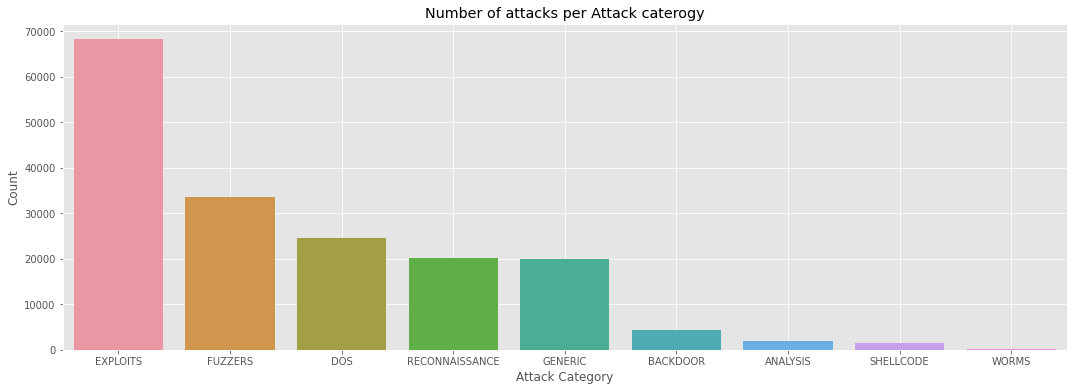

In [ ]:
# A seguir mostramos uma grafica de barras:

plt.figure(figsize=(18,6))
sns.barplot(x = newdf['Attack category'].value_counts().index, y=newdf['Attack category'].value_counts())
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.title('Number of attacks per Attack caterogy')
plt.grid(True)

In [ ]:
# A seguir também podemos ver a contagem de cada barra:

pd.DataFrame(newdf['Attack category'].value_counts())[:]

,Attack category
EXPLOITS,68211
FUZZERS,33638
DOS,24582
RECONNAISSANCE,20136
GENERIC,19860
BACKDOOR,4353
ANALYSIS,1881
SHELLCODE,1511
WORMS,169


In [ ]:
# Podemos graficar, apenas, os 6 primeiros atributos da coluna "Attack category"

a=pd.DataFrame(newdf['Attack category'].value_counts())[:6]

In [ ]:
a

,Attack category
EXPLOITS,68211
FUZZERS,33638
DOS,24582
RECONNAISSANCE,20136
GENERIC,19860
BACKDOOR,4353


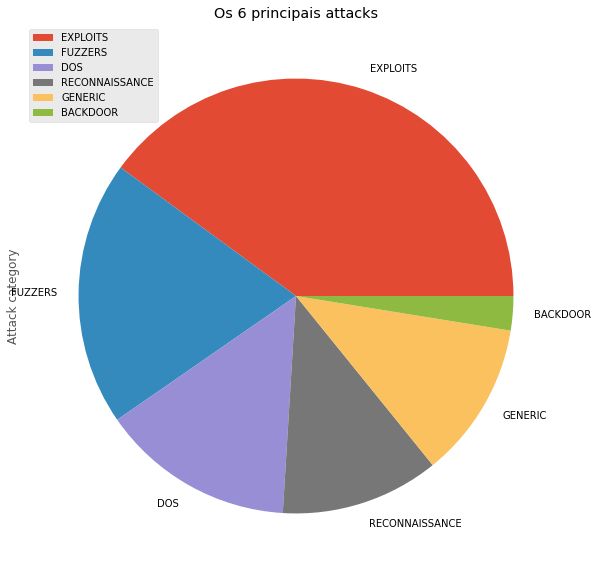

In [ ]:
# Vejamos esses atributos num gráfico de pizza:

a.plot(kind='pie', subplots=True, figsize=(10, 10))
plt.title('Os 6 principais attacks')
plt.legend(loc='upper left')
plt.show()

<font color="Agora vamos analisar os Attacks com date e time"></font>

<font color="orange">Agora vamos analisar os Attacks com Date e Time</font>

In [ ]:
# Temos:

newdf['Start time']
# Na seguinte celula vamos converter esses Dados na forma padrão

0         1421927414
1         1421927415
2         1421927416
3         1421927417
4         1421927418
             ...    
174336    1424262066
174337    1424262067
174338    1424262067
174339    1424262068
174340    1424262068
Name: Start time, Length: 174341, dtype: object

In [ ]:
# Convertendo nossos Dados de Date e Time, assim:

newdf['Start time'] = pd.to_datetime(newdf['Start time'], unit='s')
newdf['Last time'] = pd.to_datetime(newdf['Last time'], unit='s')
newdf['Duration'] = ((newdf['Last time'] - newdf['Start time']).dt.seconds).astype(int)

In [ ]:
newdf[:10] # ou também: newdf.head() ou newdf.sample()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time,Port,Destination Port Service,Duration
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,2015-01-22 11:50:14,2015-01-22 11:50:16,80.0,HTTP,2
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:15,2015-01-22 11:50:15,NaN,NaN,0
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:16,2015-01-22 11:50:16,80.0,HTTP,0
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:17,2015-01-22 11:50:17,5555.0,PERSONAL-AGENT,0
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:18,2015-01-22 11:50:18,80.0,HTTP,0
5,DOS,Miscellaneous,TCP,175.45.176.0,39500,149.171.126.15,80,Cisco DCP2100 SADownStartingFrequency Denial o...,http://www.exploit-db.com/exploits/21523/ (htt...,2015-01-22 11:50:19,2015-01-22 11:50:19,80.0,HTTP,0
6,DOS,Miscellaneous,TCP,175.45.176.0,23910,149.171.126.15,80,Cisco DCP2100 SADownStartingFrequency Denial o...,http://www.exploit-db.com/exploits/21523/ (htt...,2015-01-22 11:50:19,2015-01-22 11:50:22,80.0,HTTP,3
7,GENERIC,IXIA,TCP,175.45.176.0,29309,149.171.126.14,3000,Alt-N_MDaemon_WorldClient_Service_Memory_Corru...,CVE 2008-2631 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:20,2015-01-22 11:50:20,3000.0,REMOTEWARE-CL,0
8,EXPLOITS,Browser,TCP,175.45.176.0,61089,149.171.126.18,80,Microsoft Internet Explorer Frameset Memory Co...,CVE 2006-3637 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:21,2015-01-22 11:50:21,80.0,HTTP,0
9,EXPLOITS,Browser,TCP,175.45.176.0,4159,149.171.126.18,80,Microsoft Internet Explorer Frameset Memory Co...,CVE 2006-3637 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:21,2015-01-22 11:50:22,80.0,HTTP,1


In [ ]:
# Esta parte é importante, porque temos apenas dois dias. Os dias são os seguintes:

newdf['Start time'].astype(str).str.split(' ').str[0].unique()

array(['2015-01-22', '2015-02-18'], dtype=object)

In [ ]:
newdf.describe()

,Source Port,Destination Port,Port,Duration
count,174341.000000,174341.000000,169678.000000,174341.000000
mean,15391.130382,1304.599423,198.166592,2.341572
std,21707.824000,7466.035607,962.671658,9.309381
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,31862.000000,80.000000,80.000000,1.000000
max,65535.000000,65535.000000,43189.000000,60.000000
